# **1. Download the dataset from the source here.**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# **2. Load the dataset**

In [9]:
df = pd.read_csv("Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# **3 a). Univariate analysis**

In [11]:
#checking for categorical variables
category = df.select_dtypes(include=[np.object])
print("Categorical Variables: ",category.shape[1])

#checking for numerical variables
numerical = df.select_dtypes(include=[np.int64,np.float64])
print("Numerical Variables: ",numerical.shape[1])

Categorical Variables:  3
Numerical Variables:  11


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


In [12]:
df.columns


Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [13]:
df.shape

(10000, 14)

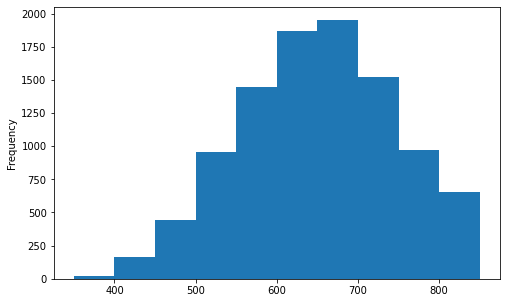

In [14]:
credit = df['CreditScore']
credit.plot(kind="hist",figsize=(8,5))

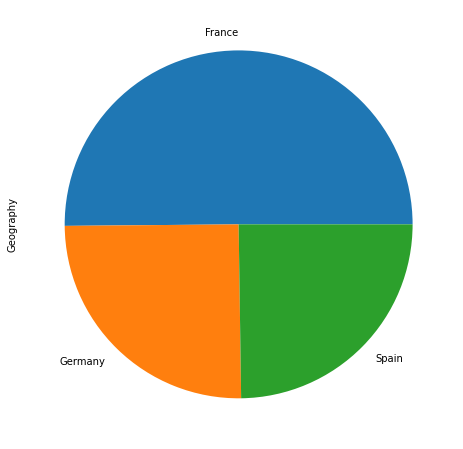

In [15]:
geo = df['Geography'].value_counts()
geo.plot(kind="pie",figsize=(10,8))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


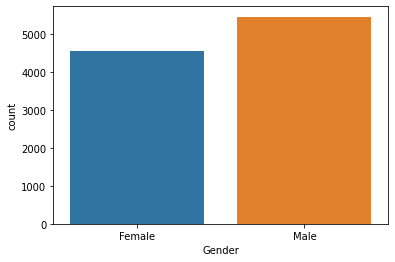

In [16]:
sns.countplot(df['Gender'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


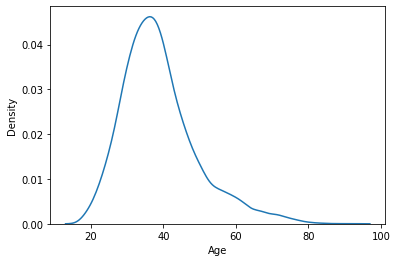

In [17]:
sns.distplot(df['Age'],hist=False)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


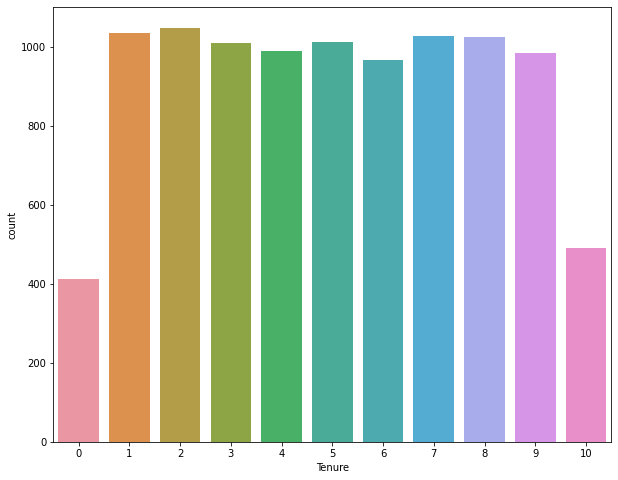

In [18]:
plt.figure(figsize=(10,8))
sns.countplot(df['Tenure'])

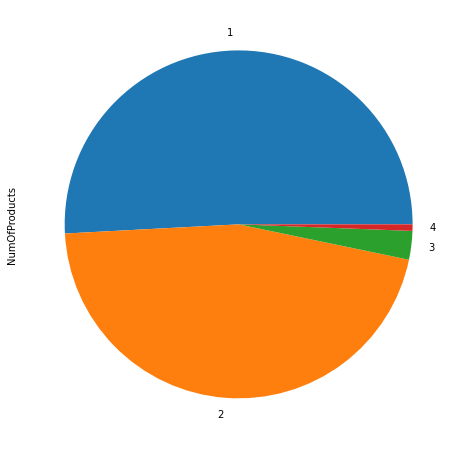

In [19]:
product = df['NumOfProducts'].value_counts()
product.plot(kind="pie",figsize=(10,8))

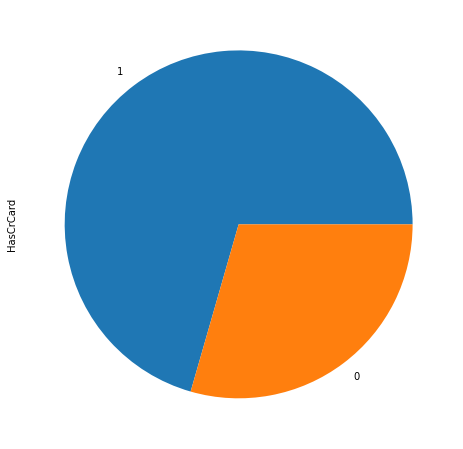

In [20]:
cr = df['HasCrCard'].value_counts()
cr.plot(kind="pie",figsize=(10,8))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


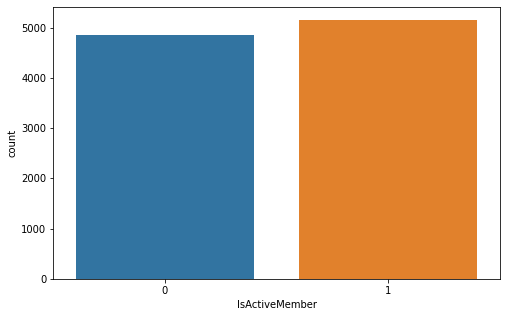

In [21]:
plt.figure(figsize=(8,5))
sns.countplot(df['IsActiveMember'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


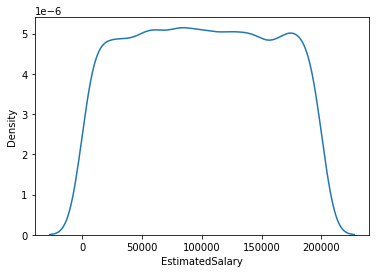

In [22]:
sns.distplot(df['EstimatedSalary'],hist=False)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


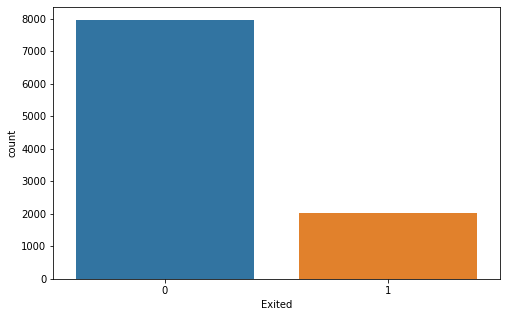

In [23]:
plt.figure(figsize=(8,5))
sns.countplot(df['Exited'])

# **3 b). Bivariate analysis**

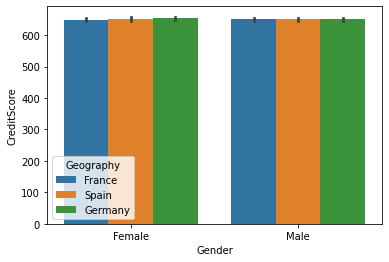

In [24]:
sns.barplot(x='Gender',y='CreditScore',hue='Geography',data=df)

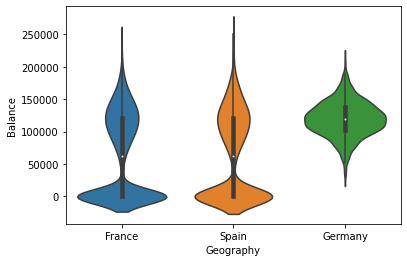

In [25]:
sns.violinplot(x='Geography',y='Balance',data=df)

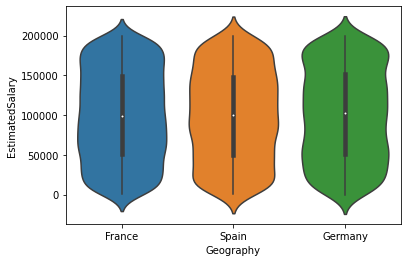

In [26]:
sns.violinplot(x='Geography',y='EstimatedSalary',data=df)

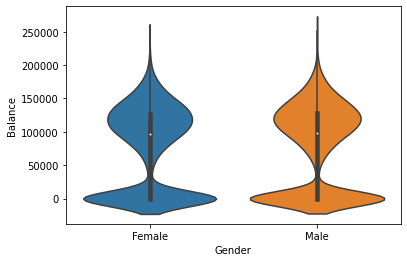

In [27]:
sns.violinplot(x='Gender',y='Balance',data=df)

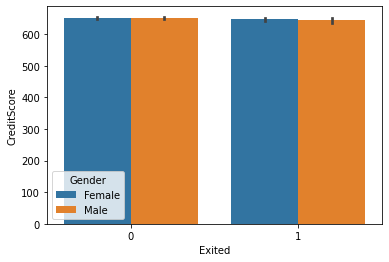

In [28]:
sns.barplot(x='Exited',y='CreditScore',hue='Gender',data=df)

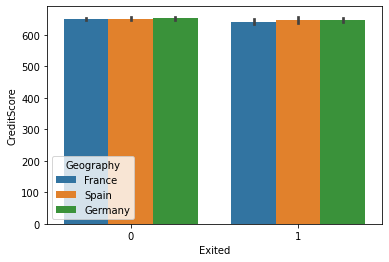

In [29]:
sns.barplot(x='Exited',y='CreditScore',hue='Geography',data=df)

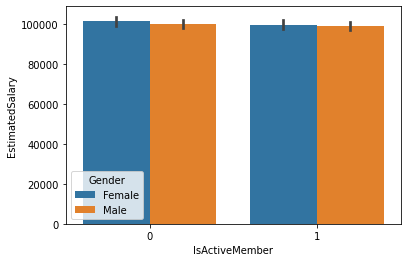

In [30]:
sns.barplot(x='IsActiveMember',y='EstimatedSalary',hue='Gender',data=df)

# **3 c). Multivariate analysis**

Gender  Geography
Female  France       2261
        Germany      1193
        Spain        1089
Male    France       2753
        Spain        1388
        Germany      1316
Name: Geography, dtype: int64


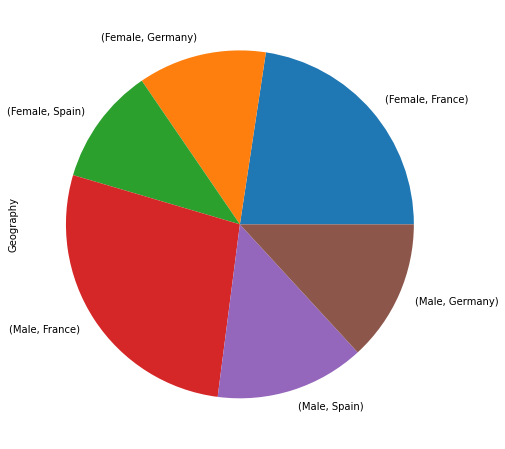

In [31]:
gp1 = df.groupby('Gender')['Geography'].value_counts()
gp1.plot(kind='pie',figsize=(10,8))
print(gp1)

In [32]:
gp2 = df.groupby('Gender')['Age'].mean()
print(gp2)

Gender
Female    39.238389
Male      38.658237
Name: Age, dtype: float64


In [33]:
gp3 = df.groupby(['Gender','Geography'])['Tenure'].mean()
print(gp3)

Gender  Geography
Female  France       4.950022
        Germany      4.965633
        Spain        5.000000
Male    France       5.049401
        Germany      5.050152
        Spain        5.057637
Name: Tenure, dtype: float64


Gender  HasCrCard  IsActiveMember
Female  0          0                 102006.080352
                   1                 102648.996944
        1          0                 101208.014567
                   1                  98510.152300
Male    0          0                  99756.431151
                   1                  99873.931251
        1          0                 100353.378996
                   1                  98914.378703
Name: EstimatedSalary, dtype: float64


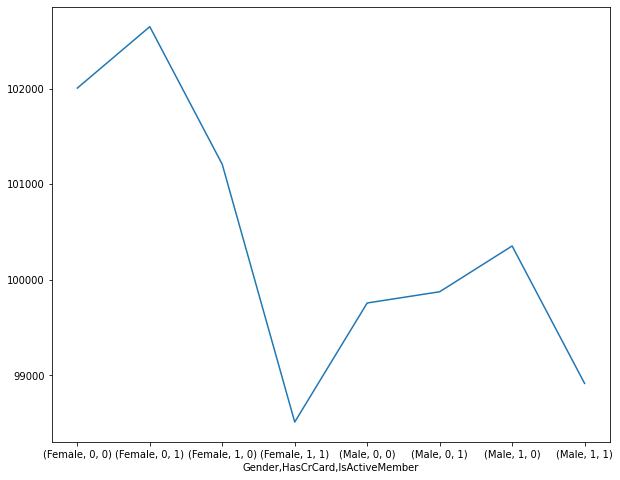

In [34]:
gp4 = df.groupby(['Gender','HasCrCard','IsActiveMember'])['EstimatedSalary'].mean()
gp4.plot(kind="line",figsize=(10,8))
print(gp4)

Gender  IsActiveMember  Exited
Female  0               0         1534
                        1          725
        1               0         1870
                        1          414
Male    0               0         2013
                        1          577
        1               0         2546
                        1          321
Name: Exited, dtype: int64


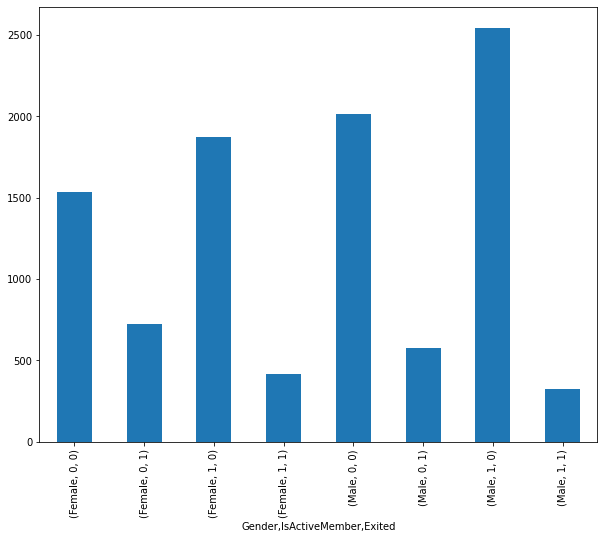

In [35]:
gp5 = df.groupby(['Gender','IsActiveMember'])['Exited'].value_counts()
gp5.plot(kind='bar',figsize=(10,8))
print(gp5)

In [36]:
gp6 = df.groupby('Exited')['Balance','EstimatedSalary'].mean()
print(gp6)

             Balance  EstimatedSalary
Exited                               
0       72745.296779     99738.391772
1       91108.539337    101465.677531


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


# **4. Descriptive statistics**

In [37]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


# **5. Handling the missing values**

In [38]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

# **6. Finding outliers**

In [39]:
def replace_outliers(df, field_name):
    Q1 = np.percentile(df[field_name],25,interpolation='midpoint')
    Q3 = np.percentile(df[field_name],75,interpolation='midpoint')
    IQR = Q3-Q1
    maxi = Q3+1.5*IQR
    mini = Q1-1.5*IQR
    df[field_name]=df[field_name].mask(df[field_name]>maxi,maxi)
    df[field_name]=df[field_name].mask(df[field_name]<mini,mini)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


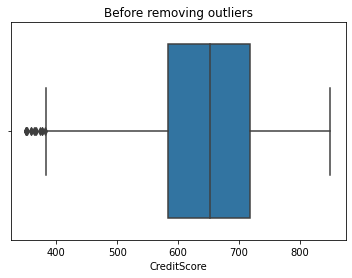

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


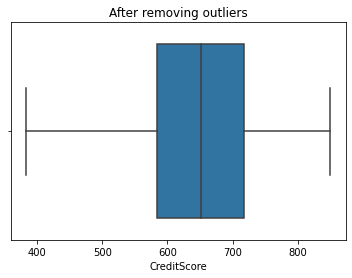

In [40]:
plt.title("Before removing outliers")
sns.boxplot(df['CreditScore'])
plt.show()
plt.title("After removing outliers")
replace_outliers(df, 'CreditScore')
sns.boxplot(df['CreditScore'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


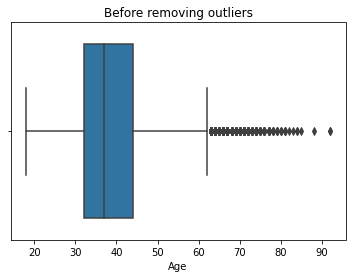

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


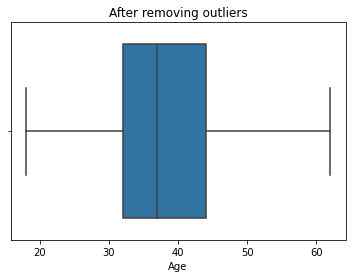

In [41]:
plt.title("Before removing outliers")
sns.boxplot(df['Age'])
plt.show()
plt.title("After removing outliers")
replace_outliers(df, 'Age')
sns.boxplot(df['Age'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


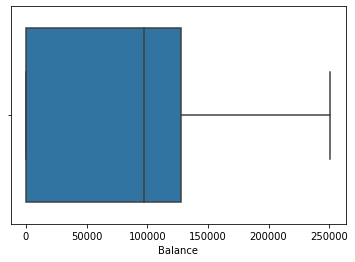

In [42]:
sns.boxplot(df['Balance'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


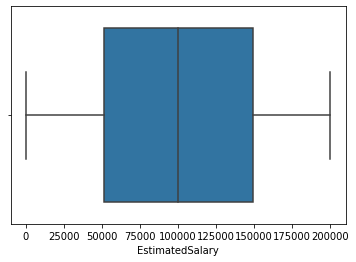

In [43]:
sns.boxplot(df['EstimatedSalary'])

# **7. Check for categorical column and perform encoding.**

In [44]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
df['Geography'] = le.fit_transform(df['Geography'])
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619.0,0,0,42.0,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608.0,2,0,41.0,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502.0,0,0,42.0,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699.0,0,0,39.0,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850.0,2,0,43.0,2,125510.82,1,1,1,79084.10,0


# **Removing unwanted columns and checking for feature importance**

In [45]:
df = df.drop(['RowNumber','CustomerId','Surname'],axis=1)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619.0,0,0,42.0,2,0.00,1,1,1,101348.88,1
1,608.0,2,0,41.0,1,83807.86,1,0,1,112542.58,0
2,502.0,0,0,42.0,8,159660.80,3,1,0,113931.57,1
3,699.0,0,0,39.0,1,0.00,2,0,0,93826.63,0
4,850.0,2,0,43.0,2,125510.82,1,1,1,79084.10,0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until


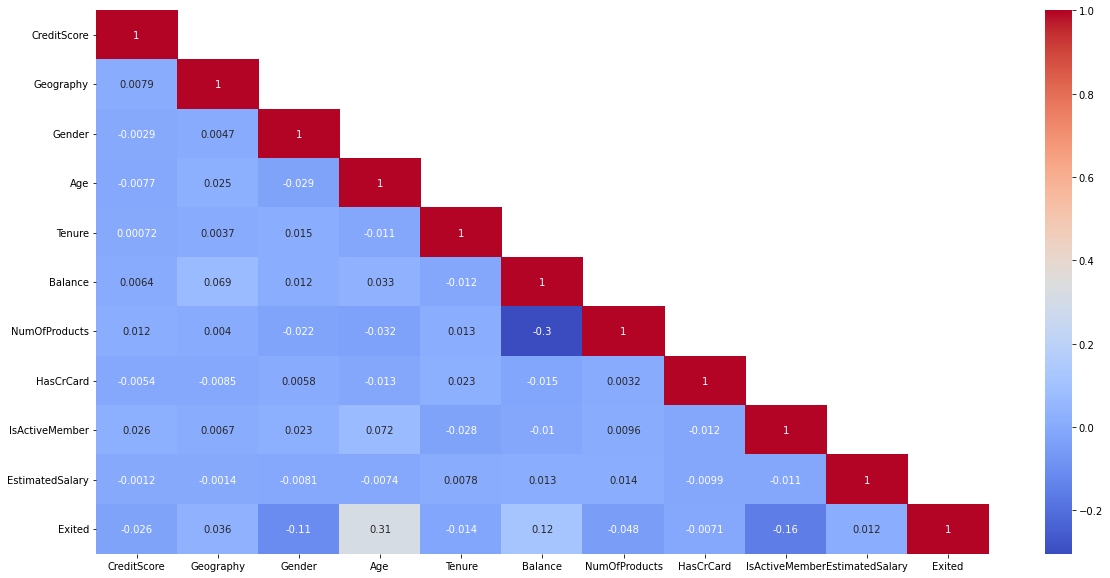

In [46]:
plt.figure(figsize=(20,10))
df_lt = df.corr(method = "pearson")
df_lt1 = df_lt.where(np.tril(np.ones(df_lt.shape)).astype(np.bool))
sns.heatmap(df_lt1,annot=True,cmap="coolwarm")

# **8. Data Splitting**

In [47]:
target = df['Exited']
data = df.drop(['Exited'],axis=1)

In [48]:
print(data.shape)
print(target.shape)

(10000, 10)
(10000,)


# **9. Scaling the independent values**

In [49]:
from sklearn.preprocessing import StandardScaler
se = StandardScaler()

In [50]:
data['CreditScore'] = se.fit_transform(pd.DataFrame(data['CreditScore']))
data['Age'] = se.fit_transform(pd.DataFrame(data['Age']))
data['Balance'] = se.fit_transform(pd.DataFrame(data['Balance']))
data['EstimatedSalary'] = se.fit_transform(pd.DataFrame(data['EstimatedSalary']))
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,-0.326878,0,0,0.342615,2,-1.225848,1,1,1,0.021886
1,-0.440804,2,0,0.240011,1,0.117350,1,0,1,0.216534
2,-1.538636,0,0,0.342615,8,1.333053,3,1,0,0.240687
3,0.501675,0,0,0.034803,1,-1.225848,2,0,0,-0.108918
4,2.065569,2,0,0.445219,2,0.785728,1,1,1,-0.365276


# **10. Train test split**

In [51]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(data,target,test_size=0.25,random_state=101)

In [52]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(7500, 10)
(2500, 10)
(7500,)
(2500,)
